# Visualization

* Fundamental step. Avoid doing things blindly without knowing the consequences.
* Benefits heavily from domain knowledge expertise.

## The dataset

Case study: weather file (driving example for the workshop, already cleaned).

Let's have a look at the file at [this file](data/epw-1_cleaned/GBR_London.Gatwick.037760_IWEC.epw').

In [1]:
# Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Execute local script with some custom settings
%run -i settings.py  

# Load the data
df = pd.read_csv('data/london-2018.csv', 
                 index_col=0, parse_dates=True)
df

drybulb  relhum  glohorrad  rainfall  windspd  winddir
2018-01-01 01:00:00     6.28   90.50        0.0  0.122079    10.25   266.82
2018-01-01 02:00:00     5.79   88.63        0.0  0.013495    10.55   271.34
2018-01-01 03:00:00     5.10   89.76        0.0  0.000444     8.96   260.11
2018-01-01 04:00:00     4.79   91.80        0.0  0.000199     8.02   242.19
2018-01-01 05:00:00     4.84   92.40        0.0  0.000625     7.74   228.02
...                      ...     ...        ...       ...      ...      ...
2018-12-31 20:00:00     7.26   91.93        0.0  0.015533     3.80   276.39
2018-12-31 21:00:00     7.17   92.34        0.0  0.011580     3.78   277.80
2018-12-31 22:00:00     7.06   92.71        0.0  0.009077     3.85   278.38
2018-12-31 23:00:00     6.71   93.86        0.0  0.012057     3.84   279.12
2019-01-01 00:00:00     6.71   93.03        0.0  0.019290     4.32   282.21

[8760 rows x 6 columns]

Always consider the metadata (data about the data).

* Units.
* Conditions of measurement.
* Limitations.
* ...


Getting familiar with the data:

- Raw data: too long to understand.
- Aggregations: yearly, monthly, daily summaries.

In [2]:
df.describe()

drybulb       relhum    glohorrad     rainfall      windspd  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean     10.947872    81.353556   151.155160     0.079979     4.933627   
std       6.845992    16.583874   231.138413     0.283166     2.543506   
min      -4.220000    31.410000     0.000000     0.000000     0.080000   
25%       5.930000    70.700000     0.000000     0.000109     2.990000   
50%      10.170000    87.290000     6.036300     0.004496     4.510000   
75%      15.842500    93.960000   236.875375     0.029499     6.340000   
max      31.890000   117.290000   927.807100     6.136456    16.160000   

           winddir  
count  8760.000000  
mean    182.759086  
std      97.407150  
min       0.080000  
25%      94.587500  
50%     201.715000  
75%     256.135000  
max     359.960000

In [3]:
# Show all rows, no matter how many
with pd.option_context('display.max_rows', None):
    # Display the monthly means of the data
    display(df.resample('M').mean())

drybulb     relhum   glohorrad  rainfall   windspd     winddir
2018-01-31   5.265828  90.457833   30.554325  0.098925  6.430592  212.266931
2018-02-28   2.115253  84.046071   80.967738  0.050604  5.599226  168.341890
2018-03-31   4.807070  85.165780  106.082851  0.133499  5.508589  170.222796
2018-04-30  10.006611  83.545903  160.173223  0.137791  4.987569  181.060819
2018-05-31  13.424194  76.899207  267.684930  0.065593  3.960054  140.855228
2018-06-30  16.481194  74.760042  304.527808  0.014193  4.167264  144.140125
2018-07-31  20.442970  67.312500  286.713289  0.046622  3.577218  161.625108
2018-08-31  18.063602  73.820605  218.728161  0.094299  4.119422  232.527298
2018-09-30  14.484528  74.901722  174.115495  0.058603  4.940750  202.088153
2018-10-31  11.098266  84.337742  103.808293  0.054437  4.932312  203.408858
2018-11-30   7.986903  89.221972   50.414840  0.093583  5.551458  151.369458
2018-12-31   6.508038  91.934126   26.069082  0.108354  5.493495  222.023535
2019-01-31   6.710000  93.030000    0.000000  0.019290  4.320000  282.210000

Pop quiz: Does this make sense for all variables?

## Plotting

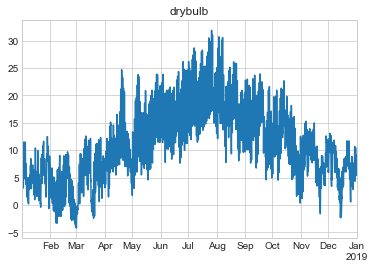

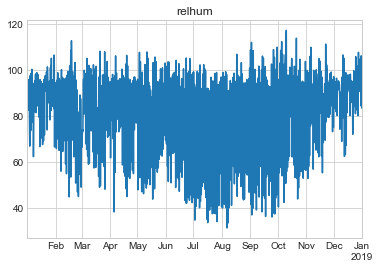

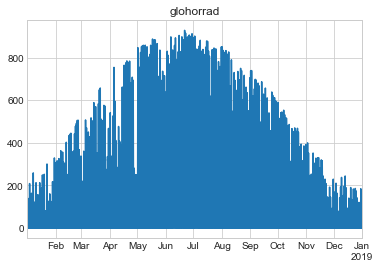

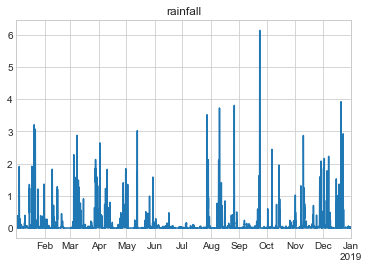

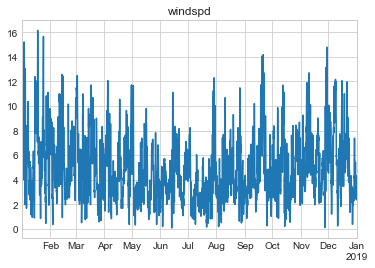

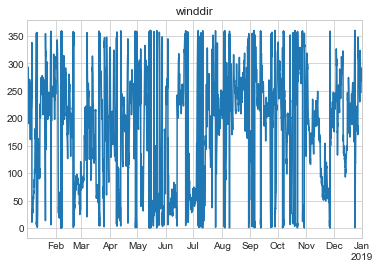

In [4]:
for i, col in enumerate(df):
    fig, ax = plt.subplots()
    df[col].plot(ax=ax, title=col)
    plt.show()

## Domain knowledge

Make sure to so some sanity checks:

* Are things as expected?
* Are things unexpected?

In our dataset, this means:
* Temperature: 
  * Units/scale (degree Celsius, Kelvin, Fahrenheit).
  * Physical range for the location at hand.
  * Seasonality: hot summer, cold winter, daily cycles.
* Relative humidity:
  * Units (might be reported as a fraction, as percentage).
  * Physical range: has to be in the interval $[0, 100]$ %.  
  * Correlations with temperature.
* Solar radiation:
  * Units (power $\text{W} \cdot \text{m}^{-2}$, energy $\text{Wh} \cdot \text{m}^{-2}$, $\text{J} \cdot \text{m}^{-2} \ldots$).
  * Physical range: should be in the interval $[0, 1300]$ $\text{Wh} \cdot \text{m}^{-2}$.
  * Behaviour: 0 at night, growing over the day, changing over seasons.

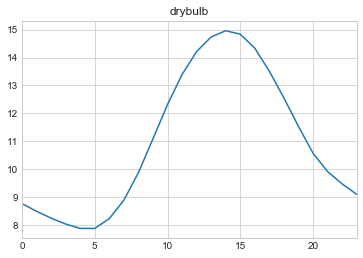

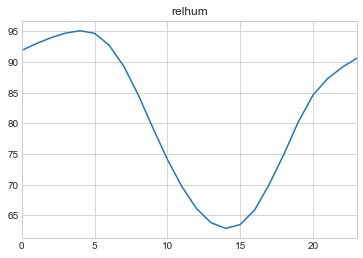

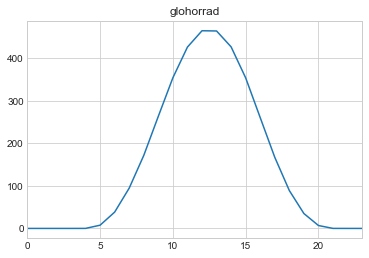

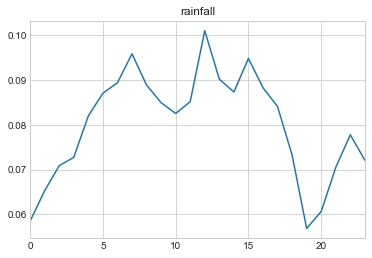

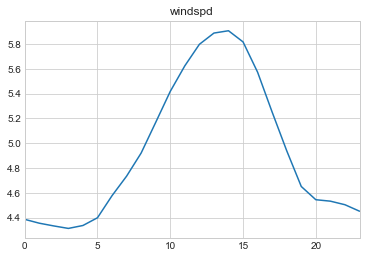

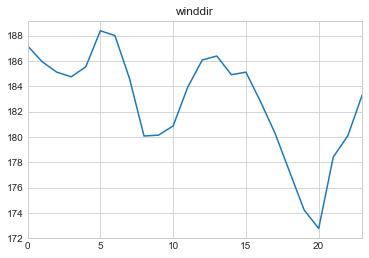

In [5]:
# Plot annual data, averaging hours between them
for i, col in enumerate(df):
    fig, ax = plt.subplots()
    df[col].groupby([df.index.hour]).mean().plot(ax=ax, title=col)
    plt.show()

## Seaborn

In [6]:
# Given the data
df_plot = df.reset_index()
df_plot

index  drybulb  relhum  glohorrad  rainfall  windspd  \
0    2018-01-01 01:00:00     6.28   90.50        0.0  0.122079    10.25   
1    2018-01-01 02:00:00     5.79   88.63        0.0  0.013495    10.55   
2    2018-01-01 03:00:00     5.10   89.76        0.0  0.000444     8.96   
3    2018-01-01 04:00:00     4.79   91.80        0.0  0.000199     8.02   
4    2018-01-01 05:00:00     4.84   92.40        0.0  0.000625     7.74   
...                  ...      ...     ...        ...       ...      ...   
8755 2018-12-31 20:00:00     7.26   91.93        0.0  0.015533     3.80   
8756 2018-12-31 21:00:00     7.17   92.34        0.0  0.011580     3.78   
8757 2018-12-31 22:00:00     7.06   92.71        0.0  0.009077     3.85   
8758 2018-12-31 23:00:00     6.71   93.86        0.0  0.012057     3.84   
8759 2019-01-01 00:00:00     6.71   93.03        0.0  0.019290     4.32   

      winddir  
0      266.82  
1      271.34  
2      260.11  
3      242.19  
4      228.02  
...       ...  
8755   276.39  
8756   277.80  
8757   278.38  
8758   279.12  
8759   282.21  

[8760 rows x 7 columns]

In [7]:
# Extract the month
df_plot['month'] = df_plot['index'].dt.month
df_plot

index  drybulb  relhum  glohorrad  rainfall  windspd  \
0    2018-01-01 01:00:00     6.28   90.50        0.0  0.122079    10.25   
1    2018-01-01 02:00:00     5.79   88.63        0.0  0.013495    10.55   
2    2018-01-01 03:00:00     5.10   89.76        0.0  0.000444     8.96   
3    2018-01-01 04:00:00     4.79   91.80        0.0  0.000199     8.02   
4    2018-01-01 05:00:00     4.84   92.40        0.0  0.000625     7.74   
...                  ...      ...     ...        ...       ...      ...   
8755 2018-12-31 20:00:00     7.26   91.93        0.0  0.015533     3.80   
8756 2018-12-31 21:00:00     7.17   92.34        0.0  0.011580     3.78   
8757 2018-12-31 22:00:00     7.06   92.71        0.0  0.009077     3.85   
8758 2018-12-31 23:00:00     6.71   93.86        0.0  0.012057     3.84   
8759 2019-01-01 00:00:00     6.71   93.03        0.0  0.019290     4.32   

      winddir  month  
0      266.82      1  
1      271.34      1  
2      260.11      1  
3      242.19      1  
4      228.02      1  
...       ...    ...  
8755   276.39     12  
8756   277.80     12  
8757   278.38     12  
8758   279.12     12  
8759   282.21      1  

[8760 rows x 8 columns]

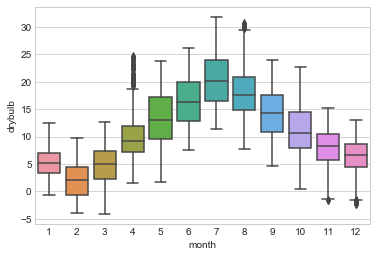

In [8]:
import seaborn as sns

# Plot box plots for every month
sns.boxplot(data=df_plot, x='month', y='drybulb')

## Practice